In [21]:
import pandas as pd 
import numpy as np 


In [23]:
# read the data 
df=pd.read_csv('cardio_dataset.csv')
df.head(10)

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,1,48,236,66,0,1,0,1.1
1,0,48,260,51,0,1,1,7.0
2,0,44,187,49,1,1,0,7.0
3,1,42,216,57,1,1,0,0.4
4,1,56,156,42,0,1,0,2.2
5,0,44,162,57,1,1,0,3.0
6,0,50,244,47,0,1,0,4.2
7,0,48,212,30,1,1,0,17.4
8,1,66,202,53,0,1,1,13.4
9,0,63,186,46,1,1,0,17.3


In [25]:
# need to convert into the dataset into data and target
dataset=df.values
data=dataset[:,0:7]
target=dataset[:,7]


In [26]:
print(data[:10],data.shape)
print(target[:10],target.shape)

[[  1.  48. 236.  66.   0.   1.   0.]
 [  0.  48. 260.  51.   0.   1.   1.]
 [  0.  44. 187.  49.   1.   1.   0.]
 [  1.  42. 216.  57.   1.   1.   0.]
 [  1.  56. 156.  42.   0.   1.   0.]
 [  0.  44. 162.  57.   1.   1.   0.]
 [  0.  50. 244.  47.   0.   1.   0.]
 [  0.  48. 212.  30.   1.   1.   0.]
 [  1.  66. 202.  53.   0.   1.   1.]
 [  0.  63. 186.  46.   1.   1.   0.]] (6644, 7)
[ 1.1  7.   7.   0.4  2.2  3.   4.2 17.4 13.4 17.3] (6644,)


In [32]:
# scaling 

from sklearn.preprocessing import MinMaxScaler

target=np.reshape(target,(-1,1))

scaleDate=MinMaxScaler()
scaleTarget=MinMaxScaler()

DataScale=scaleDate.fit_transform(data)
TargetScale=scaleTarget.fit_transform(target)


In [35]:
print(DataScale[:10],DataScale.shape)
print(TargetScale[:10],TargetScale.shape)

[[1.         0.20512821 0.40045249 0.29347826 0.         1.
  0.        ]
 [0.         0.20512821 0.45475113 0.21195652 0.         1.
  1.        ]
 [0.         0.1025641  0.28959276 0.20108696 1.         1.
  0.        ]
 [1.         0.05128205 0.35520362 0.24456522 1.         1.
  0.        ]
 [1.         0.41025641 0.21945701 0.16304348 0.         1.
  0.        ]
 [0.         0.1025641  0.23303167 0.24456522 1.         1.
  0.        ]
 [0.         0.25641026 0.41855204 0.19021739 0.         1.
  0.        ]
 [0.         0.20512821 0.34615385 0.09782609 1.         1.
  0.        ]
 [1.         0.66666667 0.32352941 0.22282609 0.         1.
  1.        ]
 [0.         0.58974359 0.28733032 0.18478261 1.         1.
  0.        ]] (6644, 7)
[[0.01172333]
 [0.08089097]
 [0.08089097]
 [0.003517  ]
 [0.02461899]
 [0.03399766]
 [0.04806565]
 [0.2028136 ]
 [0.15592028]
 [0.20164127]] (6644, 1)


In [37]:
#train test split 

from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(DataScale,TargetScale,test_size=0.2)


In [38]:
train_data.shape,train_target.shape

((5315, 7), (5315, 1))

In [45]:
#FNN arachitecture 
import keras.models as models
import keras.layers as layers
import keras.optimizers as optimizers
from keras.layers import Dropout
import numpy as np

model = models.Sequential()
model.add(layers.Dense(128, input_dim=7, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1024      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,941
Trainable params: 9,941
Non-traina

In [46]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.2)

Epoch 1/200
133/133 [==============================] - 11s 5ms/step - loss: 0.0277 - mse: 0.0277 - mae: 0.1168 - val_loss: 0.0114 - val_mse: 0.0114 - val_mae: 0.0692
Epoch 2/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0119 - mse: 0.0119 - mae: 0.0753 - val_loss: 0.0105 - val_mse: 0.0105 - val_mae: 0.0645
Epoch 3/200
133/133 [==============================] - 1s 4ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0675 - val_loss: 0.0106 - val_mse: 0.0106 - val_mae: 0.0636
Epoch 4/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0619 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0509
Epoch 5/200
133/133 [==============================] - 0s 4ms/step - loss: 0.0081 - mse: 0.0081 - mae: 0.0589 - val_loss: 0.0075 - val_mse: 0.0075 - val_mae: 0.0519
Epoch 6/200
133/133 [==============================] - 0s 3ms/step - loss: 0.0071 - mse: 0.0071 - mae: 0.0557 - val_loss: 0.0061 - val_mse: 0.0061 - val_mae: 0.0474
Epoch 7/2

133/133 [==============================] - 1s 4ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0402 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0348
Epoch 51/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0387 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0357
Epoch 52/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0394 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0354
Epoch 53/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0398 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0361
Epoch 54/200
133/133 [==============================] - 0s 3ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0390 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0347
Epoch 55/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0387 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0347
Epoch 56/200
133/

133/133 [==============================] - 0s 2ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0372 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0358
Epoch 100/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0375 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0372
Epoch 101/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0374 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0355
Epoch 102/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0374 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0361
Epoch 103/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0370 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0359
Epoch 104/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0370 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0360
Epoch 105/20

133/133 [==============================] - 0s 2ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0376 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0368
Epoch 149/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0371 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0359
Epoch 150/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0366 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0363
Epoch 151/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0367 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0366
Epoch 152/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0366 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0367
Epoch 153/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0369 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0373
Epoch 154/20

133/133 [==============================] - 0s 2ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0377 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0393
Epoch 198/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0365 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0377
Epoch 199/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0362 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0375
Epoch 200/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0366 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0372


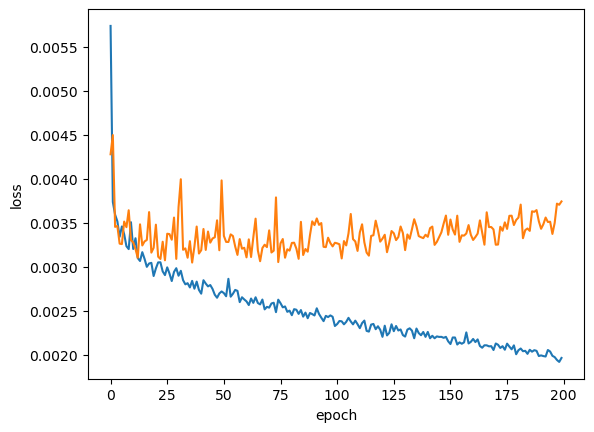

In [44]:
# without dropout layer 
from matplotlib import pyplot as plt 
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

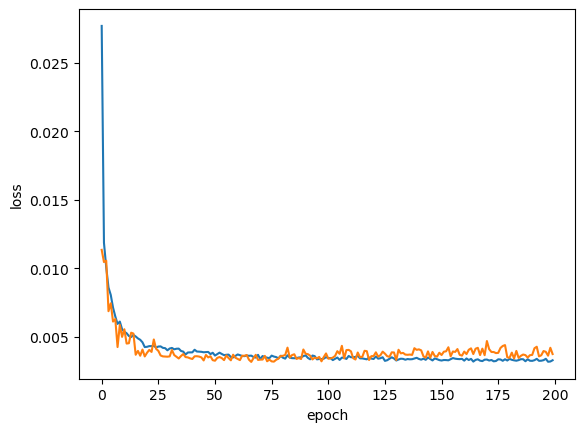

In [47]:
# with the dropout layers 
from matplotlib import pyplot as plt 
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [50]:
# we need to fine the r2 score just coz this is a regression problem 

from sklearn.metrics import r2_score

predicted_data =model.predict(test_data)
r2_score=r2_score(test_target,predicted_data)

print("r2 acure", r2_score)

42/42 [==============================] - 0s 2ms/step
r2 acure 0.8464897020454138


In [52]:
print(predicted_data[:10].T)
print(test_target[:10].T)

[[0.03331825 0.26555988 0.10987234 0.16604045 0.10952759 0.0336089
  0.03521569 0.3858155  0.10793319 0.16614631]]
[[0.01641266 0.22977726 0.15123095 0.25908558 0.13247362 0.01641266
  0.01641266 0.41500586 0.0926143  0.09495897]]


In [67]:
print('predicted data invers transform',scaleTarget.inverse_transform(predicted_data[:10]).T)
print('actual target invers transform',scaleTarget.inverse_transform(test_target[:10]).T)

predicted data invers transform [[ 2.9420469 22.752258   9.472111  14.26325    9.442703   2.966839
   3.1038985 33.010063   9.306702  14.27228  ]]
actual target invers transform [[ 1.5 19.7 13.  22.2 11.4  1.5  1.5 35.5  8.   8.2]]
